# Chargement des données

In [1]:
import scipy.io

mat = scipy.io.loadmat('Win60sec-Overlap5sec\\SyncMatrix_dyad11.mat')
mat_data = mat['WTC3DmatrixDyad']
print(mat_data.shape)
mat_data

(6, 6, 32)


array([[[0.58745874, 0.04121334, 0.83062308, ..., 0.77715397,
         0.40040684, 0.51384109],
        [0.13299164, 0.05885301, 0.78434884, ..., 0.76093409,
         0.41691831, 0.62359153],
        [0.37782257, 0.04510019, 0.80408279, ..., 0.81461301,
         0.44574902, 0.61150281],
        [0.36968585, 0.02940177, 0.80505182, ..., 0.66291259,
         0.48634061, 0.23436161],
        [0.14548705, 0.07932605, 0.89006519, ..., 0.69747613,
         0.45256109, 0.38209212],
        [0.02122784, 0.18079191, 0.33004888, ..., 0.34657507,
         0.64298734, 0.09523615]],

       [[0.61087551, 0.75713481, 0.64871423, ..., 0.77262145,
         0.45949193, 0.56784564],
        [0.07037493, 0.82746299, 0.59540833, ..., 0.75587771,
         0.48034956, 0.24781146],
        [0.29601293, 0.79531754, 0.63454446, ..., 0.80312919,
         0.44636583, 0.25819669],
        [0.30719007, 0.69383635, 0.73447522, ..., 0.61873082,
         0.39056637, 0.23898677],
        [0.23530999, 0.82788198, 0.698

In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 10 16:45:05 2025',
 '__version__': '1.0',
 '__globals__': [],
 'INFOS': array([[(array([[60]], dtype=uint8), array([[5]], dtype=uint8), array([[32]], dtype=uint8), MatlabOpaque([(b'', b'MCOS', b'string', array([[3707764736],
                              [         2],
                              [         1],
                              [         1],
                              [         1],
                              [         1]], dtype=uint32))          ],
                      dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]), array([[(array([[2160]], dtype=uint16), array([[7.81]]), array([[16869.6]]), array([[180]], dtype=uint8), array([[1405.8]]), array([[1406]], dtype=uint16), array([[15464]], dtype=uint16), array([[0]], dtype=uint8), array([[1800]], dtype=uint16), array([[469]], dtype=uint16), array([[430]], dtype=uint16))]],
               dtype=[('expeduration', 'O'), ('sf', 'O'),

## Concaténation des données

In [3]:
import os
import numpy as np

def load_all_data(directory):
    all_data = []
    for file in os.listdir(directory):
        if file.endswith(".mat"):
            mat = scipy.io.loadmat(os.path.join(directory, file))
            mat_data = mat['WTC3DmatrixDyad']
            all_data.append(mat_data)
    return np.array(all_data)

all_data = load_all_data('Win60sec-Overlap5sec')
all_data.shape

(36, 6, 6, 32)

In [4]:
def all_matrices(data):
    matrices = []
    for i in range(data.shape[0]):
        for j in range(data.shape[3]):
            matrices.append(data[i, :, :, j])
    return np.array(matrices)

all_matrices = all_matrices(all_data)
all_matrices.shape

(1152, 6, 6)

# Détermination du nombre de clusters

## Méthode du coude

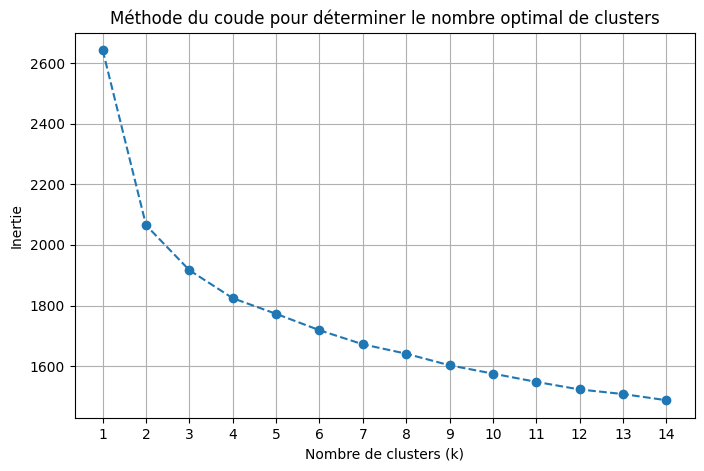

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exemple de données (1152 matrices 6x6)
data = all_matrices

# Aplatir les matrices 6x6 en vecteurs de 36 dimensions
flattened_data = data.reshape(1152, -1)  # Dimensions : (1152, 36)

# Normaliser les données
flattened_data_normalized = flattened_data / flattened_data.max()

# Liste pour stocker les valeurs d'inertie
inertia_values = []

# Tester différents nombres de clusters
k_range = range(1, 15)  # Choisir k entre 1 et 14
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(flattened_data_normalized)
    inertia_values.append(kmeans.inertia_)  # Inertie (somme des distances au carré intra-cluster)

# Tracer le graphe de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xticks(k_range)
plt.grid()
plt.show()


## Silhouette score

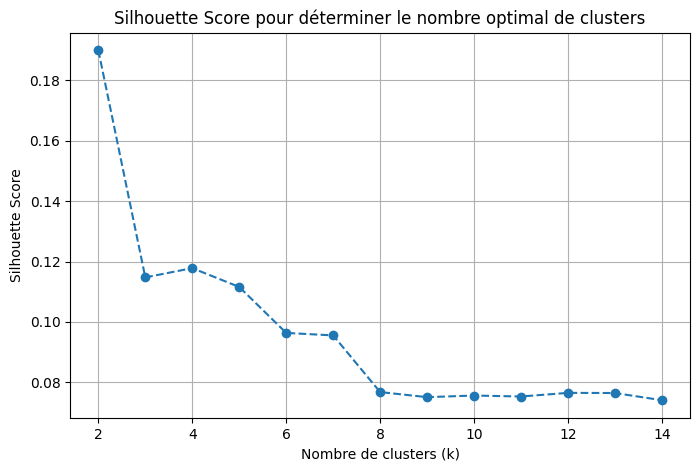

In [6]:
# Utiliser le silhouette score pour déterminer le nombre optimal de clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(flattened_data_normalized)
    silhouette_scores.append(silhouette_score(flattened_data_normalized, cluster_labels))

# Tracer le graphe du silhouette score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score pour déterminer le nombre optimal de clusters")
plt.grid()

# Clustering et affichage des résultats

## Clustering à l'aide de KMeans

In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exemple de données (1152 matrices 6x6)
data = all_matrices

# Aplatir les matrices 6x6 en vecteurs de 36 dimensions
flattened_data = data.reshape(1152, -1)  # Dimensions : (1152, 36)

# Normaliser les données
flattened_data_normalized = flattened_data / flattened_data.max()

# Appliquer le k-means avec un nombre de clusters choisi (par exemple, k=4)
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(flattened_data_normalized)
labels = kmeans.labels_


## Affichage des centroïdes de chaque cluster

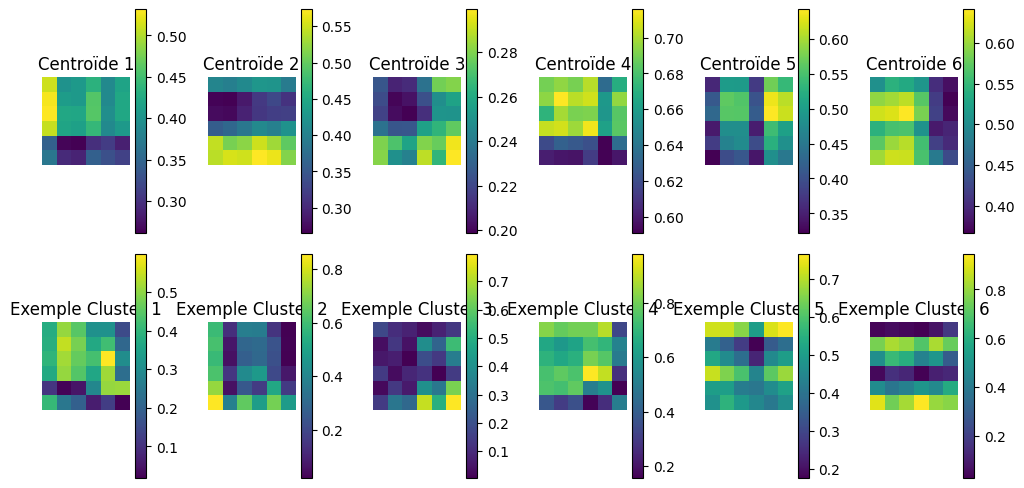

In [8]:
# Reshape des centroïdes en matrices 6x6
centroid_matrices = kmeans.cluster_centers_.reshape(k, 6, 6)

# Visualisation des centroïdes
plt.figure(figsize=(10, 5))
for i in range(k):
    plt.subplot(2, k, i + 1)
    plt.imshow(centroid_matrices[i], cmap='viridis', interpolation='nearest')
    plt.title(f'Centroïde {i+1}')
    plt.colorbar()
    plt.axis('off')

# Visualisation de quelques exemples de matrices par cluster
for i in range(k):
    cluster_indices = np.where(labels == i)[0]  # Indices des matrices dans le cluster i
    example_matrix = data[cluster_indices[0]]  # Exemple de matrice dans ce cluster
    plt.subplot(2, k, k + i + 1)
    plt.imshow(example_matrix, cmap='viridis', interpolation='nearest')
    plt.title(f'Exemple Cluster {i+1}')
    plt.colorbar()
    plt.axis('off')

plt.tight_layout()
plt.show()

## Affichage du nombre de matrices dans chaque cluster

In [9]:
# Compter le nombre de matrices dans chaque cluster
unique, counts = np.unique(labels, return_counts=True)

# Afficher les résultats
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} matrices")


Cluster 0: 221 matrices
Cluster 1: 178 matrices
Cluster 2: 280 matrices
Cluster 3: 157 matrices
Cluster 4: 156 matrices
Cluster 5: 160 matrices


## Affichage d'exemples de matrices présentes dans un cluster particulier

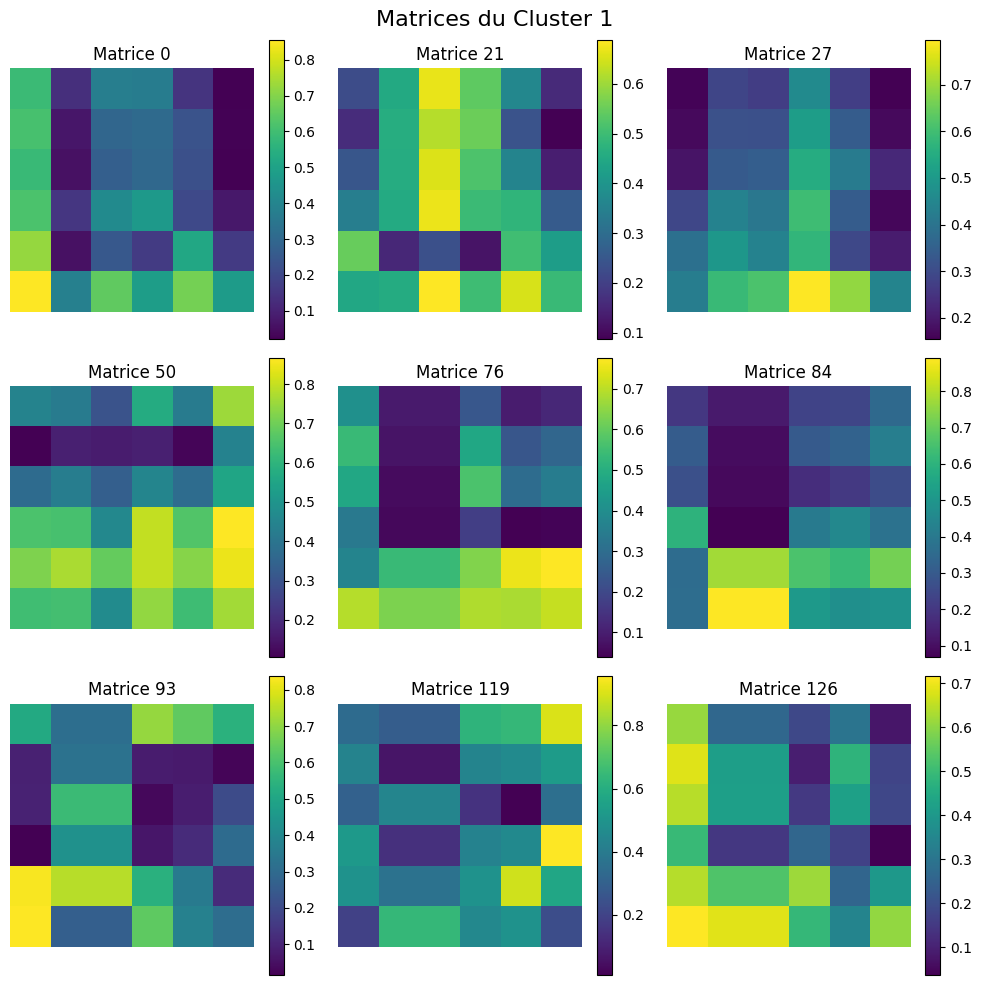

In [10]:
# Choisir un cluster à visualiser (par exemple, cluster 1)
cluster_to_visualize = 1

# Trouver les indices des matrices appartenant au cluster choisi
indices = np.where(labels == cluster_to_visualize)[0]

# Afficher les matrices du cluster
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices[:9]):  # Limiter l'affichage aux 9 premières matrices
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[idx], cmap='viridis', interpolation='nearest')
    plt.title(f'Matrice {idx}')
    plt.colorbar()
    plt.axis('off')

plt.suptitle(f'Matrices du Cluster {cluster_to_visualize}', fontsize=16)
plt.tight_layout()
plt.show()


## Affichage du silhouette score du clustering considéré

In [11]:
# Mesure de silhouette des clusters
from sklearn.metrics import silhouette_score

# Calculer le score de silhouette
silhouette_avg = silhouette_score(flattened_data, labels)
silhouette_avg

0.09633872313189516

## Réassignation de chaque matrice à sa dyade

In [12]:
# Réassocier les matrices à sa dyades en donnant le numéro du cluster
def assign_clusters_to_dyads(data, labels):
    dyad_clusters = {}
    for i, label in enumerate(labels):
        dyad = i // 32  # 32 matrices par dyade
        if dyad not in dyad_clusters:
            dyad_clusters[dyad] = []
        dyad_clusters[dyad].append(label)
    return dyad_clusters

dyad_clusters = assign_clusters_to_dyads(data, labels)
dyad_clusters

{0: [1,
  5,
  3,
  4,
  2,
  5,
  2,
  0,
  2,
  0,
  2,
  3,
  3,
  3,
  2,
  0,
  2,
  4,
  3,
  3,
  5,
  1,
  5,
  2,
  5,
  2,
  2,
  1,
  5,
  5,
  0,
  0],
 1: [2,
  0,
  5,
  0,
  5,
  0,
  3,
  2,
  2,
  2,
  5,
  5,
  3,
  0,
  2,
  4,
  3,
  2,
  1,
  3,
  4,
  4,
  5,
  3,
  0,
  3,
  5,
  4,
  3,
  0,
  4,
  0],
 2: [0,
  2,
  2,
  3,
  3,
  2,
  0,
  2,
  3,
  2,
  2,
  2,
  1,
  4,
  4,
  0,
  3,
  3,
  3,
  4,
  1,
  0,
  0,
  2,
  0,
  5,
  0,
  2,
  5,
  1,
  2,
  0],
 3: [2,
  5,
  0,
  4,
  3,
  0,
  5,
  2,
  3,
  5,
  2,
  0,
  2,
  3,
  4,
  2,
  0,
  3,
  2,
  4,
  0,
  4,
  3,
  1,
  2,
  4,
  2,
  5,
  2,
  0,
  1,
  3],
 4: [0,
  2,
  1,
  0,
  0,
  1,
  4,
  4,
  5,
  0,
  1,
  1,
  1,
  0,
  4,
  4,
  1,
  1,
  5,
  3,
  1,
  0,
  0,
  1,
  4,
  4,
  0,
  1,
  1,
  0,
  1,
  0],
 5: [2,
  2,
  0,
  3,
  2,
  2,
  3,
  2,
  5,
  2,
  1,
  1,
  1,
  2,
  0,
  1,
  2,
  0,
  3,
  1,
  2,
  1,
  4,
  0,
  1,
  4,
  2,
  2,
  0,
  3,
  1,
  2],
 6: [2,
  5,
  5

## Evolution de l'état de synchronisation de chaque dyade en fonction du temps

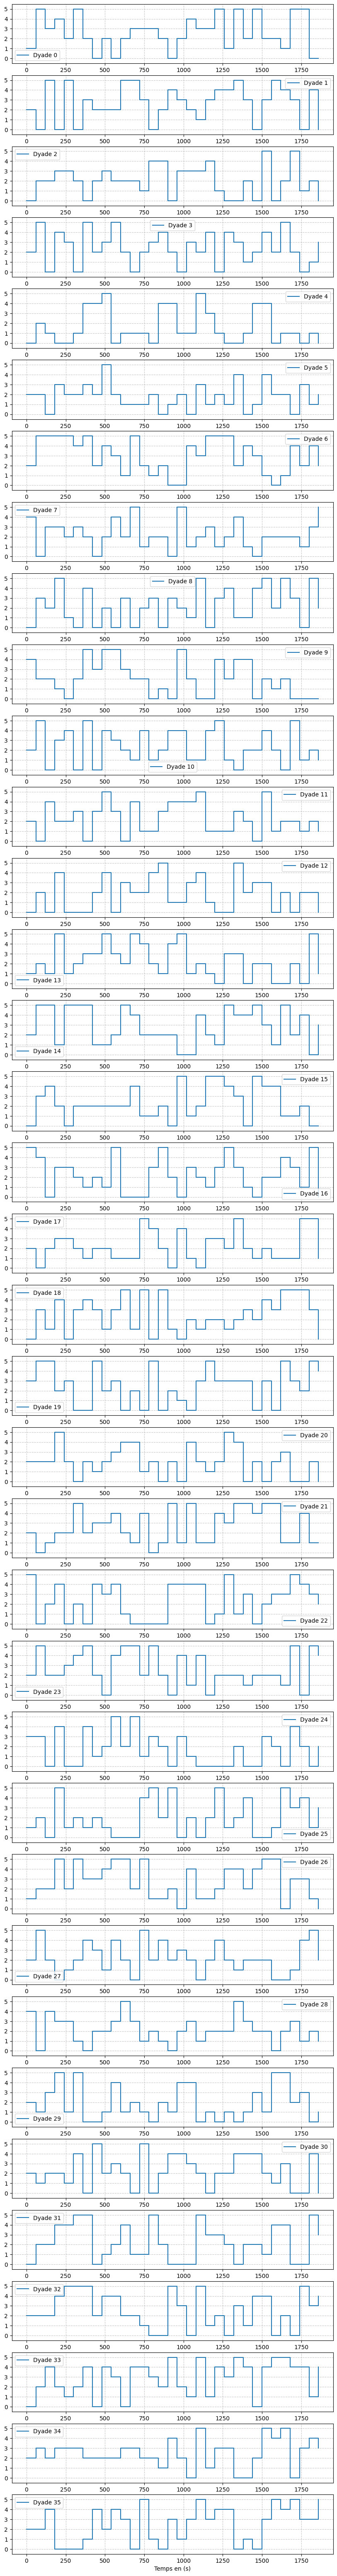

In [13]:
fig, axes = plt.subplots(len(dyad_clusters), 1, figsize=(10, 80), sharex=False)

step_size = 60
time = np.arange(len(next(iter(dyad_clusters.values()))))*step_size  # Créer l'axe des X

for i, (key, values) in enumerate(dyad_clusters.items()):
    unique_values = sorted(set(values))  # Déterminer les valeurs uniques pour l'axe des Y
    axes[i].step(time, values, where='post', label=f"Dyade {key}")
    axes[i].set_ylim(min(unique_values) - 0.5, max(unique_values) + 0.5)
    axes[i].set_yticks(unique_values)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()

plt.xlabel("Temps en (s)")
plt.show()

In [14]:
# Clustering avec un autre algorithme : DBSCAN
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN
for i in np.arange(0.9, 1.0, 0.01):
    dbscan = DBSCAN(eps=i, min_samples=5)
    dbscan_labels = dbscan.fit_predict(flattened_data_normalized)

    unique, counts = np.unique(dbscan_labels, return_counts=True)
    print(f"Epsilon = {i}")
    print(unique, counts)



Epsilon = 0.9
[-1  0  1] [850 131 171]
Epsilon = 0.91
[-1  0] [821 331]
Epsilon = 0.92
[-1  0] [802 350]
Epsilon = 0.93
[-1  0  1] [778 370   4]
Epsilon = 0.9400000000000001
[-1  0  1] [764 384   4]
Epsilon = 0.9500000000000001
[-1  0] [751 401]
Epsilon = 0.9600000000000001
[-1  0] [721 431]
Epsilon = 0.9700000000000001
[-1  0  1] [694 454   4]
Epsilon = 0.9800000000000001
[-1  0  1] [662 486   4]
Epsilon = 0.9900000000000001
[-1  0  1] [626 522   4]


In [15]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(flattened_data_normalized)

unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([0, 1, 2], dtype=int64), array([458, 427, 267], dtype=int64))

In [16]:
# Calculer le silhouette score de l'agglomerative clustering
silhouette_avg = silhouette_score(flattened_data_normalized, labels)
silhouette_avg

0.08290984037119672